<a href="https://colab.research.google.com/github/VanneHernandez/ASTAR/blob/main/parcialDiagnosticoMedico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pgmpy networkx matplotlib hmmlearn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

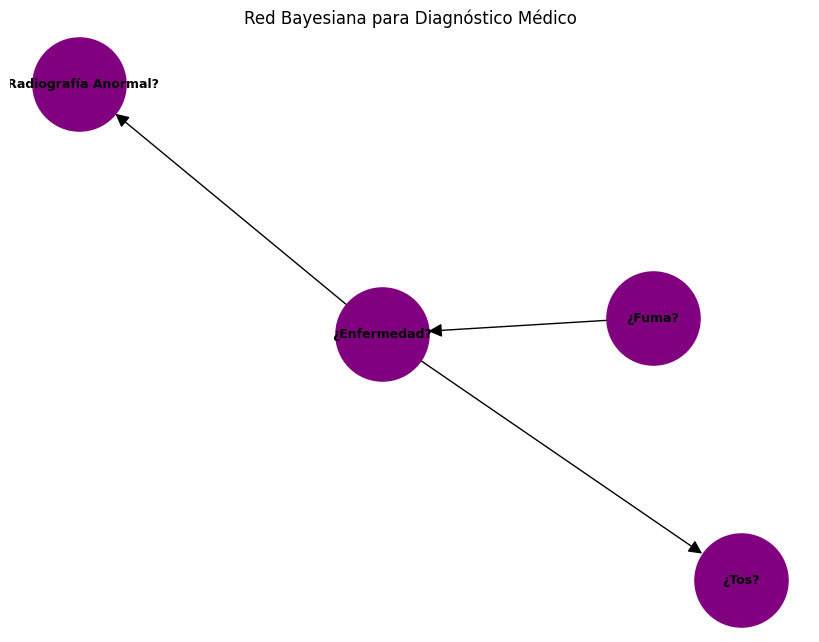


Probabilidad de Enfermedad dado que el paciente fuma y tiene tos:
+----------------+-------------------+
| Enfermedad     |   phi(Enfermedad) |
+================+===================+
| Enfermedad(No) |            0.2000 |
+----------------+-------------------+
| Enfermedad(Sí) |            0.8000 |
+----------------+-------------------+

Interpretación: P(Enfermedad=Sí | Fuma=Sí, Tos=Sí) = 80.00%

Probabilidad de ser Fumador dado que la radiografía es anormal:
+-------------+----------------+
| Fumador     |   phi(Fumador) |
+=============+================+
| Fumador(No) |         0.5040 |
+-------------+----------------+
| Fumador(Sí) |         0.4960 |
+-------------+----------------+

Interpretación: P(Fumador=Sí | Radiografía Anormal=Sí) = 49.60%

Probabilidad de tener Tos dado que no tiene enfermedad:
+---------+------------+
| Tos     |   phi(Tos) |
+=========+============+
| Tos(No) |     0.7000 |
+---------+------------+
| Tos(Sí) |     0.3000 |
+---------+------------+

Inter

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

modelo_medico = DiscreteBayesianNetwork([
    ('Fumador', 'Enfermedad'),
    ('Enfermedad', 'Tos'),
    ('Enfermedad', 'RadiografiaAnormal')
])

tp_fumador = TabularCPD(variable='Fumador', variable_card=2, values=[[0.7], [0.3]],
                        state_names={'Fumador': ['No', 'Sí']})

tp_enfermedad = TabularCPD(
    variable='Enfermedad',
    variable_card=2,
    values=[[0.9, 0.4], [0.1, 0.6]],
    evidence=['Fumador'],
    evidence_card=[2],
    state_names={'Fumador': ['No', 'Sí'], 'Enfermedad': ['No', 'Sí']}
)

tp_tos = TabularCPD(
    variable='Tos',
    variable_card=2,
    values=[[0.7, 0.2], [0.3, 0.8]],
    evidence=['Enfermedad'],
    evidence_card=[2],
    state_names={'Enfermedad': ['No', 'Sí'], 'Tos': ['No', 'Sí']}
)

tp_radiografia = TabularCPD(
    variable='RadiografiaAnormal',
    variable_card=2,
    values=[[0.8, 0.1], [0.2, 0.9]],
    evidence=['Enfermedad'],
    evidence_card=[2],
    state_names={'Enfermedad': ['No', 'Sí'], 'RadiografiaAnormal': ['No', 'Sí']}
)

modelo_medico.add_cpds(tp_fumador, tp_enfermedad, tp_tos, tp_radiografia)

assert modelo_medico.check_model()

G_medico = nx.DiGraph()
G_medico.add_nodes_from(modelo_medico.nodes)
G_medico.add_edges_from(modelo_medico.edges)

plt.figure(figsize=(8, 6))
pos_medico = nx.spring_layout(G_medico, seed=42)
labels_medico = {'Fumador': '¿Fuma?', 'Enfermedad': '¿Enfermedad?', 'Tos': '¿Tos?', 'RadiografiaAnormal': '¿Radiografía Anormal?'}
nx.draw(G_medico, pos_medico, with_labels=True, labels=labels_medico,
        node_color='purple',
        node_size=4500,
        font_size=9,
        font_weight='bold',
        arrows=True,
        arrowstyle='-|>',
        arrowsize=20)
plt.title("Red Bayesiana para Diagnóstico Médico")
plt.show()

Inferencia_medica = VariableElimination(modelo_medico)

resultado_enfermedad = Inferencia_medica.query(variables=['Enfermedad'], evidence={'Fumador': 'Sí', 'Tos': 'Sí'})
print("\nProbabilidad de Enfermedad dado que el paciente fuma y tiene tos:")
print(resultado_enfermedad)
print(f"\nInterpretación: P(Enfermedad=Sí | Fuma=Sí, Tos=Sí) = {resultado_enfermedad.values[1]*100:.2f}%")

resultado_fumador = Inferencia_medica.query(variables=['Fumador'], evidence={'RadiografiaAnormal': 'Sí'})
print("\nProbabilidad de ser Fumador dado que la radiografía es anormal:")
print(resultado_fumador)
print(f"\nInterpretación: P(Fumador=Sí | Radiografía Anormal=Sí) = {resultado_fumador.values[1]*100:.2f}%")

resultado_tos_no_enfermedad = Inferencia_medica.query(variables=['Tos'], evidence={'Enfermedad': 'No'})
print("\nProbabilidad de tener Tos dado que no tiene enfermedad:")
print(resultado_tos_no_enfermedad)
print(f"\nInterpretación: P(Tos=Sí | Enfermedad=No) = {resultado_tos_no_enfermedad.values[1]*100:.2f}%")